# Statistical and Systematic Fluctuations

<CENTER><img src="https://github.com/zlmarshall/notebooks-collection-opendata/blob/DQ_and_NCB/images/ATLASOD.gif?raw=1" style="width:50%"></CENTER>

This notebook uses [ATLAS Open Data](http://opendata.atlas.cern) [2025 beta release](https://opendata.atlas.cern/docs/data/for_education/13TeV25_details) to build your intuition for statistical and systematic fluctuations. It is intended for an education audience and is written to be accessible to a wide range of students.

## What are Fluctuations?

When we perform an analysis with ATLAS data, very often we are confronted with histograms of data and a background prediction, and we need to make a judgement about whether the two agree. It can be difficult to build intuition for what level of disagreement one might expect, and often even experienced physicists disagree about whether there might be a discrepancy that is worthy of closer inspection (for example, one that might be a hint towards a new discovery). The alternative, of course, is that the differences are simply [statistical fluctuations](https://en.wikipedia.org/wiki/Statistical_fluctuations) — the regular thing we expect in every analysis.

## Looking at fluctuations

In this notebook, we are going to start from the background in the $H\rightarrow\gamma\gamma$ analysis, which you can find at the end of our [$H\rightarrow\gamma\gamma$ notebook](https://opendata.atlas.cern/docs/13TeV25Doc/StandardModel#higgs-to-γγ-analysis-new).

We are going to use a random number generator to create two kinds of fluctuations:

* Statistical fluctuations. These are random fluctuations that occur in all counting experiments. As a simple example, imagine counting the number of cars that pass by you on a road. You might have a very good understanding of the number of cars that will go by in an hour (the _rate_), but if you watch the road for only a few seconds it is likely that you would not see an "average" number of cars go by — it might be quite a bit lower or higher than you expect.
* Systematic fluctuations. Most data analyses have _systematic uncertainties_, which we explore in [this notebook](https://opendata.atlas.cern/docs/13TeV25Doc/Concepts#systematic-uncertainties-new). These uncertainties cause a systematic bias when estimating the expected number of events we will see. We might always be a bit high, or a bit low.

Each analysis has different numbers of events and different sizes of systematic uncertainty, so we will build our example to be easy to adjust to fit any scenario.

## Setting up the histograms

We're going to install and then import a couple of packages to use for our example. `matplotlib` is a convenient package to draw histograms. We're going to use the `numpy` package only for its random number generation features.

In [ ]:
!pip install matplotlib numpy

Now we'll import the packages we installed, along with the `random` module from `numpy` which can be used to generate pseduo-random numbers.

In [2]:
import matplotlib.pyplot as plt # for plotting
import matplotlib_inline # to edit the inline plot format
from matplotlib.ticker import AutoMinorLocator # for minor ticks
import numpy.random as nrand # For generating pseudo-random numbers
from math import sqrt # For simple statistical uncertainty display

Now we'll set a couple of parameters that define how many events will appear in our analysis and how large our systematic uncertainties should be. In this cell, we will also define the function that we'll use for the background estimate. Notice that the statistical uncertainty affects every point returned by `bg_function` individually, while the systematic uncertainty is a coherent shift of all of the points.

In [3]:
# For the size of the sample.
# This will be roughly the value in the first bin of the distribution
norm = 25

# For the size of the systematic uncertainty. 0.3 means 30% uncertainty
# Set to zero to disable systematic uncertainty
systematics = 0.01

def bg_function(mass: float, norm: float, shift: float, vary: bool) -> float:
    """The background expectation for our histogram 
    This function is taken from the H -> gamma gamma notebook:
    https://opendata.atlas.cern/docs/13TeV25Doc/StandardModel#higgs-to-γγ-analysis-new
    
    Args:
        mass: the mass at the center of the bin that we're interested in
        norm: the normalization for the background
        shift: the shift due to the systematic uncertainty in the background
        vary: apply statistical variation on the expectation
    Returns:
        The expected number of events in that bin
    """
    # Get the nominal prediction
    prediction = norm*(-73505.40949130041 + 2727.283084690243*mass - 32.46476885131053*mass**2 + 0.16067342179849034*mass**3 - 0.0002876910216020786*mass**4)/6431.03867463228
    # If we didn't want fluctuations, we are already done
    if not vary:
        return prediction
    # Shift the prediction according to the systematic uncertainty
    prediction *= (1+shift)
    # Apply a Poisson fluctuation of the observation, return the expectation
    return nrand.poisson(prediction)

Now we can make our histogram and fill its bins with our expectations. We will draw the histogram in the same cell, for reasons that will become obvious in a moment.

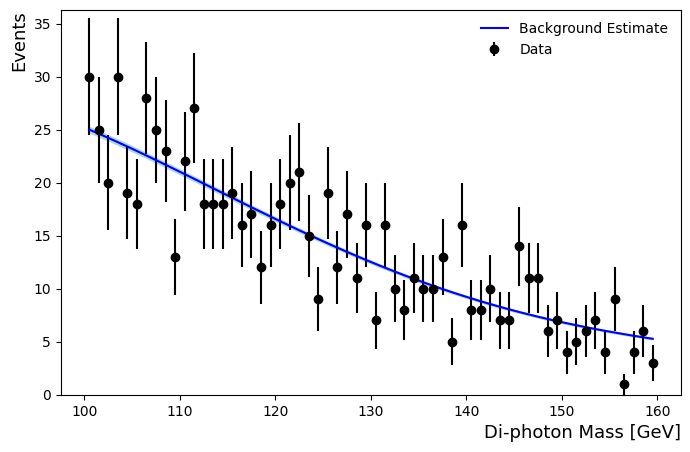

In [4]:
# Generate a random number for the systematic shift
# It is a Gaussian, centered at 0, with the width of the systematic uncertainty
shift = nrand.normal(0., systematics)

# To make our histogram, we just have to keep track of the values in each bin
bin_centers = [] # Bin centers
y_values = [] # Data in each bin
y_err = [] # Data uncertainties
bg_nom = [] # Background predictions

# Now we fill the bins of the histogram
for mass_step in range(60):
    mass = 100.5+mass_step
    # The mass we want is the bin center
    bin_centers += [ mass ]
    # The y-value is the background prediction in that bin
    y_values += [ bg_function(mass, norm, shift, True) ]
    # The y-uncertainty is just the square root of that value
    y_err += [ sqrt(y_values[-1]) ]
    # Also record the nominal background
    bg_nom += [ bg_function(mass, norm, shift, False) ]

# We're going to make a plot with the matplotlib package
# It's quite powerful and has lots of nice features, but the syntax takes some getting used to
# Set up the figure and the axes on which we'll draw
fig, ax = plt.subplots(figsize=(8, 5))

# Now we can define the plot
ax.errorbar(x=bin_centers, y=y_values, yerr=y_err,
                    fmt='ko', # 'k' means black and 'o' is for circles
                    label='Data')

# Now plot our "background estimate"
ax.plot(bin_centers, bg_nom, color='blue', label='Background Estimate')
# And the uncertainty band
ax.fill_between(bin_centers, [x*(1-systematics) for x in bg_nom],
                [x*(1+systematics) for x in bg_nom], color='#add8e6')

# x-axis label
ax.set_xlabel(r'Di-photon Mass [GeV]',
                    fontsize=13, x=1, horizontalalignment='right')

# write y-axis label for main axes
ax.set_ylabel('Events',
                     fontsize=13, y=1, horizontalalignment='right')

# set y-axis limits for main axes
ax.set_ylim( bottom=0, top=max(y_values+bg_nom)*(1.+systematics+0.2) )

# draw the legend
ax.legend( frameon=False ); # no box around the legend

## What am I looking at?

This plot shows a mocked-up example of how data would appear if a background estimate is _exactly right_, and we see the expected statistical and systematic fluctuations. Try re-running the cell above a few dozen times, and you will see all kinds of interesting things in a variety of plots. Sometimes there will be single bins where it looks like there are far more or far fewer events than expected. Sometimes it looks like there is a bump, or a dip, in the number of events, that spans across several bins. The reality, of course, is that our brain is making up these patterns. We are _trained_ to identify patterns, and it can be very hard to look at a distribution and convince yourself that it is just the expected fluctuations (this is similar to, or an instance of, [Pareidolia](https://en.wikipedia.org/wiki/Pareidolia)).

Try a few different settings for the systematic uncertainties (to see what systematic uncertainties in the background estimate can produce) and for the normalization (to see what statistical fluctuations look like, and how they appear to change from when there are very few events to when there are lots of events). It's useful to make at least a handful of plots each time, so that you can see what the variation looks like.

In order to rigorously understand whether data are _actually_ discrepant when comparing to a background estimate, it is important to perform a real statistical analysis. These analyses take into account the expected level of variation, and can tell us whether the fluctuations we are seeing are in fact consistent with the background. There are a few other ways that you can check whether a bump in a distribution might be exciting:

* Does the bump appear somewhere that is already well understood, or somewhere new? If the mass range, or data set has already been thoroughly explored, it's somewhat more likely that this is a fluctuation. If it's a new mass range, then it might be exciting!
* Hold the histogram upside-down. Is there a new bump that looks just as significant? Fluctuations tend to appear as both dips and peaks, and if there's a dip that's as big as your peak, it's more likely that peak is a fluctuation. If the peak is much bigger than any dips, that might be exciting!
* Is there something you can think of that could cause a peak in that distribution? In some distributions (like an invariant mass distribution), we normally expect new particles to be the source of the most exciting bumps. In a distribution like transverse momentum, we don't expect physics could produce any significant peaks, so you might be looking at a fluctuation — or an effect of the calibration or the detector that isn't understood.

Playing with this notebook can help you build intuition for fluctuations. We hope that after some time with these plots you'll be ready to look at any histogram and quickly identify whether there's something interesting hiding in there.

<div class="alert alert-block alert-info">
We welcome your feedback on this notebook or any of our other materials! Please <a href="https://forms.gle/zKBqS1opAHHemv9U7">fill out this survey</a> to let us know how we're doing, and you can enter a raffle to win some <a href="https://atlas-secretariat.web.cern.ch/merchandise">ATLAS merchandise</a>!
</div>